<a href="https://colab.research.google.com/github/RaquelMamani/RaquelMamani-ComprasdeServicios_Gutierrez_Mamani/blob/main/Insights%2BGutierrezRocio_MamaniRaquel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storytelling: Compras de Servicios

Integrantes:
Rocio Gutierrez
Raquel Mamani

###Contexto
La empresa X tiene implementado el sistema SAP para centralizar la gestión de compras de bienes y servicios. El área de Compras de Servicios requiere de un Sourcing Plan para poder planear su tiempo para la atención efectiva de los requerimientos.

###Audiencia
Este análisis intenta planificar, con evidencia, el Sourcing Plan por lo cuál puede ser de utilidad para el área de compras y también a las áreas de finanzas, presupuestos y las áreas usuarias de la empresa. 

###Limitaciones
El sistema SAP es ideal para bienes debido a que cuenta con categorización de materiales, almacenes, compra automática de bienes por renovación, entre otros. Esto lamentablemente no es aplicable para servicios, deja abierta la descripción de servicios, por lo que desde este punto no es posible categorizar los servicios así como generar reportes ejecutivos. 

#Preguntas de interés

###Preguntas principales o primarias
¿Qué servicios se adjudican? ¿Con qué monto y en qué periodo?

###Preguntas secundarias
¿Cuál es el top 10 de proveedores a nivel de corporación?
¿Qué porcentaje de las adjudicaciones corresponde a servicios regulares y spot?
¿Qué unidad genera el mayor gasto y cantidad de requerimientos?
¿Cuántos requerimientos son atendidos por cada comprador?



#1. Análisis exploratorio de los datos

## 1.1 Limpieza de datos

In [29]:
# Carga de archivos
from google.colab import drive
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


In [30]:
#Importar todas las base de datos
import pandas as pd
DfOS2018 = pd.read_csv('/content/gdrive/MyDrive/Coderhouse/DataScience/GutierrezMamani/Data_Wrangling/exportOS2018.csv', sep=";")
DfOS2019 = pd.read_csv('/content/gdrive/MyDrive/Coderhouse/DataScience/GutierrezMamani/Data_Wrangling/exportOS2019.csv', sep=";")
DfOS2020 = pd.read_csv('/content/gdrive/MyDrive/Coderhouse/DataScience/GutierrezMamani/Data_Wrangling/exportOS2020.csv', sep=";")
DfOS2021 = pd.read_csv('/content/gdrive/MyDrive/Coderhouse/DataScience/GutierrezMamani/Data_Wrangling/exportOS2021.csv', sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,10,12,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,12,14,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
#Visualización preliminar de dataframe de Ordenes de Servicio y Compras (OS)
DfOS2021.head(2)

,Documento compras,Posición,Fecha documento,Nombre del proveedor,Centro,Grupo de compras,Material,Texto breve,Unidad medida pedido,Cantidad de pedido,...,Indicador de borrado,Cl.documento compras,Tipo de imputación,Tipo de posición.1,Organización compras,Tipo doc.compras,Número de necesidad,In.período validez,Fin período validez,Urgencia necesidad
0,4200009934,10,1/01/2021,217783 CORPORACION PRIMAX S.A.,MP10,331,201410.0,"PETROLEO,DIESEL,B5 (S-50),95%",GAL,"19,800.000",...,NaN,FO,NaN,NaN,MPU1,F,NaN,31/12/2020,8/01/2021,0
1,4200009935,10,2/01/2021,217783 CORPORACION PRIMAX S.A.,MP11,214,201410.0,"PETROLEO,DIESEL,B5 (S-50),95%",GAL,"40,000.000",...,NaN,FO,NaN,NaN,MPU1,F,NaN,2/08/2019,31/12/2020,0


In [32]:
#Contatenamos los dataframes de OS de los años 2018 al 2021
framesOS = [DfOS2018, DfOS2019, DfOS2020, DfOS2021]
DfOS = pd.concat (framesOS)
DfOS

,Documento compras,Posición,Fecha documento,Nombre del proveedor,Centro,Grupo de compras,Material,Texto breve,Unidad medida pedido,Cantidad de pedido,...,Cl.documento compras,Tipo de imputación,Tipo de posición.1,Organización compras,Tipo doc.compras,Número de necesidad,In.período validez,Fin período validez,Estado liberación,Urgencia necesidad
0,4200006905,10,1/01/2018,215712 CONTUGAS S.A.C.,MP13,212,600000,GAS NATURAL USO INDUSTRIAL,MB,"46,743.090",...,FO,F,NaN,MPU1,F,NaN,28/11/2017,29/12/2017,XX,0
1,4200006905,20,1/01/2018,215712 CONTUGAS S.A.C.,MP13,212,600000,GAS NATURAL USO INDUSTRIAL,MB,725.490,...,FO,F,NaN,MPU1,F,NaN,28/11/2017,29/12/2017,XX,0
2,4200006905,30,1/01/2018,215712 CONTUGAS S.A.C.,MP13,212,600000,GAS NATURAL USO INDUSTRIAL,MB,475.580,...,FO,F,NaN,MPU1,F,NaN,28/11/2017,29/12/2017,XX,0
3,4200006905,40,1/01/2018,215712 CONTUGAS S.A.C.,MP13,212,600000,GAS NATURAL USO INDUSTRIAL,MB,499.770,...,FO,F,NaN,MPU1,F,NaN,28/11/2017,29/12/2017,XX,0
4,4200006905,50,1/01/2018,215712 CONTUGAS S.A.C.,MP13,212,600000,GAS NATURAL USO INDUSTRIAL,MB,463.500,...,FO,F,NaN,MPU1,F,NaN,28/11/2017,29/12/2017,XX,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89899,7000027656,240,22/12/2021,RP11 Raura Mina Raura,RP11,110,2524188,HERVIDOR ELECTRICO 1.7 LT,PZA,3,...,RUB,NaN,V,RPU1,F,NaN,NaN,NaN,NaN,0
89900,7000027656,250,22/12/2021,RP11 Raura Mina Raura,RP11,110,2525105,COMBO LICUADORA + OLLA ARR + PLANCHA,PZA,2,...,RUB,NaN,V,RPU1,F,NaN,NaN,NaN,NaN,0
89901,7000027656,260,22/12/2021,RP11 Raura Mina Raura,RP11,110,2514600,POLOS DEPORTIVOS,PZA,10,...,RUB,NaN,V,RPU1,F,NaN,NaN,NaN,NaN,0
89902,7000027656,270,22/12/2021,RP11 Raura Mina Raura,RP11,110,2525106,PARRILLA ELECTRICA MULTIUSO,PZA,3,...,RUB,NaN,V,RPU1,F,NaN,NaN,NaN,NaN,0


In [33]:
#Iniciamos la limpieza de los datos con la eliminación de los duplicados del dataframe de OS
DfOS = DfOS.drop_duplicates()

In [34]:
#Se segmenta las ordenes de servicio, donde no exite un código de material. A continuación, se observa un ejemplo del dataset. 
dfServicios = DfOS[DfOS['Material'].isnull()]
dfServicios

,Documento compras,Posición,Fecha documento,Nombre del proveedor,Centro,Grupo de compras,Material,Texto breve,Unidad medida pedido,Cantidad de pedido,...,Cl.documento compras,Tipo de imputación,Tipo de posición.1,Organización compras,Tipo doc.compras,Número de necesidad,In.período validez,Fin período validez,Estado liberación,Urgencia necesidad
22,4200006909,10,2/01/2018,218318 CJ NETCOM S.A.C.,RP11,102,NaN,Sostenimiento - Mina,UA,1,...,FO,F,F,RPU1,F,NaN,27/11/2017,31/12/2017,XX,0
23,4200006912,10,3/01/2018,10214 ADMINISTRACION DE EMPRES,RP11,102,NaN,Desatado de rocas con scaler,UA,1,...,FO,F,F,RPU1,F,NaN,27/11/2017,31/12/2017,XX,0
24,4200006912,20,3/01/2018,10214 ADMINISTRACION DE EMPRES,RP11,102,NaN,Laboreo / Sostenimiento / Servicios,UA,1,...,FO,F,F,RPU1,F,NaN,27/11/2017,31/12/2017,XX,0
25,4200006913,10,3/01/2018,16500 MANPOWER PERU S.A.,MP10,323,NaN,Ampliación de presupuesto,UA,1,...,FO,U,F,MPU1,F,NaN,3/01/2017,28/02/2018,XX,0
26,4200006914,10,3/01/2018,10214 ADMINISTRACION DE EMPRES,RP11,102,NaN,Laboreo / Sostenimiento (AFE),UA,1,...,FO,F,F,RPU1,F,NaN,1/12/2017,31/12/2017,XX,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89215,5800010483,10,26/12/2021,220382 IMPROMEC S.R.L.,RP11,238,NaN,Reforzamiento estructural nave de flotac,UA,1,...,RSB,N,F,RPU1,F,PLANTA,NaN,NaN,NaN,0
89216,5800010484,10,29/12/2021,22561 GoldSim Technology Group,RP11,238,NaN,Software Goldsim,UA,1,...,RSB,N,F,RPU1,F,NaN,NaN,NaN,NaN,0
89217,5800010485,10,29/12/2021,220825 DHI PERU S.A.C.,RP11,238,NaN,Software Felow 7.5,UA,1,...,RSB,N,F,RPU1,F,NaN,NaN,NaN,NaN,0
89218,5800010486,10,31/12/2021,216713 WHITE LION S.A.,RP11,230,NaN,Instalación de Sist. Comensales - 2Pers.,UA,1,...,RSB,K,F,RPU1,F,NaN,NaN,NaN,NaN,0


In [35]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


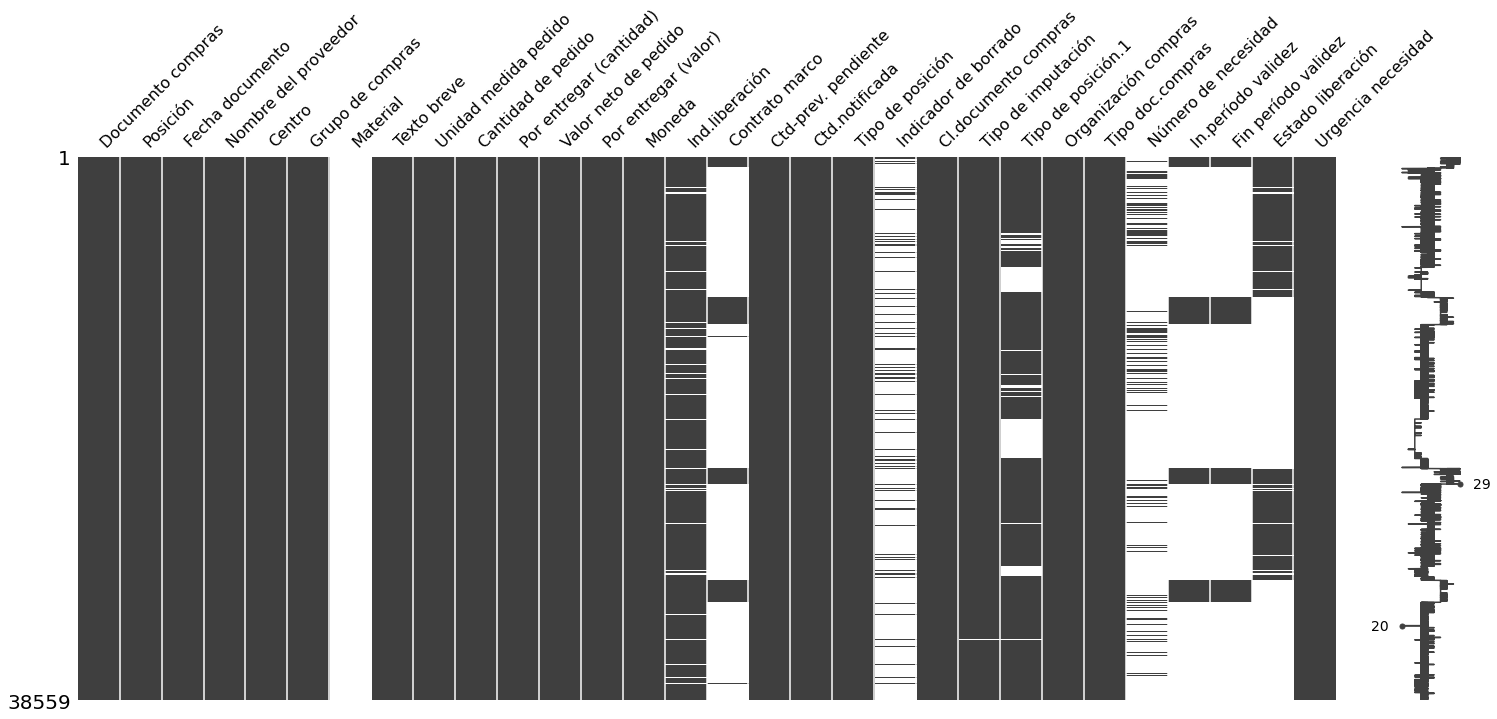

In [36]:
#Instalamos missihgno para tener una vista general de las columnas con datos y vacíos del dataframe de HES. Se observa datos relevantes como la fecha de generación de orden
# de compra, nombre del proveedor, centro o unidad minera, texto breve o descripción del servicio, valor neto de pedido, por entregar o saldo de pedido, moneda y contrato marco.
import missingno as msno
msno.matrix(dfServicios)

In [37]:
# Se valida el tipo de dato de las columnas.
dfServicios.dtypes

Documento compras            int64
Posición                     int64
Fecha documento             object
Nombre del proveedor        object
Centro                      object
Grupo de compras             int64
Material                    object
Texto breve                 object
Unidad medida pedido        object
Cantidad de pedido          object
Por entregar (cantidad)     object
Valor neto de pedido        object
Por entregar (valor)        object
Moneda                      object
Ind.liberación              object
Contrato marco             float64
Ctd-prev. pendiente        float64
Ctd.notificada             float64
Tipo de posición             int64
Indicador de borrado        object
Cl.documento compras        object
Tipo de imputación          object
Tipo de posición.1          object
Organización compras        object
Tipo doc.compras            object
Número de necesidad         object
In.período validez          object
Fin período validez         object
Estado liberación   

In [38]:
#Se selecciona las columnas más relevantes para el estudio
dfServicios=dfServicios[['Documento compras', 'Posición', 'Fecha documento', 'Nombre del proveedor', 'Texto breve','Valor neto de pedido', 'Por entregar (valor)', 'Moneda', 'Contrato marco', 'Organización compras', 'In.período validez', 'Fin período validez']]
dfServicios

,Documento compras,Posición,Fecha documento,Nombre del proveedor,Texto breve,Valor neto de pedido,Por entregar (valor),Moneda,Contrato marco,Organización compras,In.período validez,Fin período validez
22,4200006909,10,2/01/2018,218318 CJ NETCOM S.A.C.,Sostenimiento - Mina,"395,314.84",0.00,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017
23,4200006912,10,3/01/2018,10214 ADMINISTRACION DE EMPRES,Desatado de rocas con scaler,"41,438.96",0.00,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017
24,4200006912,20,3/01/2018,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento / Servicios,"1,174,570.87",0.00,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017
25,4200006913,10,3/01/2018,16500 MANPOWER PERU S.A.,Ampliación de presupuesto,"445,200.00",0.00,PEN,4.000001e+09,MPU1,3/01/2017,28/02/2018
26,4200006914,10,3/01/2018,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento (AFE),"228,957.43",0.00,USD,4.000001e+09,RPU1,1/12/2017,31/12/2017
...,...,...,...,...,...,...,...,...,...,...,...,...
89215,5800010483,10,26/12/2021,220382 IMPROMEC S.R.L.,Reforzamiento estructural nave de flotac,"119,877.68",0.00,USD,NaN,RPU1,NaN,NaN
89216,5800010484,10,29/12/2021,22561 GoldSim Technology Group,Software Goldsim,"4,950.00",0.00,USD,NaN,RPU1,NaN,NaN
89217,5800010485,10,29/12/2021,220825 DHI PERU S.A.C.,Software Felow 7.5,"17,450.00",0.00,USD,NaN,RPU1,NaN,NaN
89218,5800010486,10,31/12/2021,216713 WHITE LION S.A.,Instalación de Sist. Comensales - 2Pers.,"4,435.00","4,435.00",USD,NaN,RPU1,NaN,NaN


In [39]:
# La columna Valor neto de pedido, se pasa a formato float. 
dfServicios['Valor neto de pedido'] = dfServicios['Valor neto de pedido'].str.replace(',', '').astype(float)
dfServicios['Por entregar (valor)'] = dfServicios['Por entregar (valor)'].str.replace(',', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
#Edito información, debido a que es confidencial. 
dfServicios[['Valor neto de pedido']] = dfServicios[['Valor neto de pedido']]/2100
dfServicios[['Por entregar (valor)']] = dfServicios[['Por entregar (valor)']]/2100
dfServicios

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Documento compras,Posición,Fecha documento,Nombre del proveedor,Texto breve,Valor neto de pedido,Por entregar (valor),Moneda,Contrato marco,Organización compras,In.período validez,Fin período validez
22,4200006909,10,2/01/2018,218318 CJ NETCOM S.A.C.,Sostenimiento - Mina,188.245162,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017
23,4200006912,10,3/01/2018,10214 ADMINISTRACION DE EMPRES,Desatado de rocas con scaler,19.732838,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017
24,4200006912,20,3/01/2018,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento / Servicios,559.319462,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017
25,4200006913,10,3/01/2018,16500 MANPOWER PERU S.A.,Ampliación de presupuesto,212.000000,0.000000,PEN,4.000001e+09,MPU1,3/01/2017,28/02/2018
26,4200006914,10,3/01/2018,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento (AFE),109.027348,0.000000,USD,4.000001e+09,RPU1,1/12/2017,31/12/2017
...,...,...,...,...,...,...,...,...,...,...,...,...
89215,5800010483,10,26/12/2021,220382 IMPROMEC S.R.L.,Reforzamiento estructural nave de flotac,57.084610,0.000000,USD,NaN,RPU1,NaN,NaN
89216,5800010484,10,29/12/2021,22561 GoldSim Technology Group,Software Goldsim,2.357143,0.000000,USD,NaN,RPU1,NaN,NaN
89217,5800010485,10,29/12/2021,220825 DHI PERU S.A.C.,Software Felow 7.5,8.309524,0.000000,USD,NaN,RPU1,NaN,NaN
89218,5800010486,10,31/12/2021,216713 WHITE LION S.A.,Instalación de Sist. Comensales - 2Pers.,2.111905,2.111905,USD,NaN,RPU1,NaN,NaN


In [41]:
# Se corrige los tipos de datos para poder manipularlos y generar reportes. En este caso, la columna Fecha se pasa a formato datetime.
dfServicios['Fecha documento'] = pd.to_datetime(dfServicios['Fecha documento'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
#No DP = (dfServicios['Contrato marco']).astype(bool)
dfServicios['Contrato marco']

22       4.000001e+09
23       4.000001e+09
24       4.000001e+09
25       4.000001e+09
26       4.000001e+09
             ...     
89215             NaN
89216             NaN
89217             NaN
89218             NaN
89903             NaN
Name: Contrato marco, Length: 38559, dtype: float64

Defino las variables relevantes para el estudio.

Documento compras: Es la Orden de compra (bienes) u Orden de Servicio (Servicio) elaborada y aprobada por cada comprador.

Posición: Cada orden de servicio tiene filas mediante el cual dividen los sub servicios de un servicio adjudicado.

Fecha de documento: Fecha en la cual fue aprobado la orden de compra.

Nombre del proveedor: Empresa a quien fue adjudicado el servicio denominado.

Texto breve: Descripción del servicio.

Valor neto de pedido: Monto adjudicado por orden de servicio. 

Por entregar (valor): Monto restante que queda como saldo en la orden de servicio. 

Moneda: Moneda de la orden de servicio. 

Contrato marco: Orden de servicio macro para servicios recurrentes que se adjudican a través de contrato y por un periodo mayor a 1 año.

Organización compras: Unidad operativa de la empresa. Son 5 organizaciones. 

In. período validez: Fecha de inicio de vigencia del contrato marco. 

Fin período validez: Fecha de fin de vigencia del contrato marco. 

## 1.2 Visualizaciones

In [15]:
# Se extrae las librerías con el objetivo de realizar las visualizaciones preliminares.
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
import plotly.express as px

### 2.1 Resumen de metadata

In [43]:
dfServicios.describe().round()

,Documento compras,Posición,Valor neto de pedido,Por entregar (valor),Contrato marco
count,3.855900e+04,38559.0,38559.0,36406.0,5.422000e+03
mean,5.215810e+09,75.0,30.0,4.0,4.000002e+09
std,1.354500e+09,213.0,445.0,290.0,3.820000e+02
min,4.200007e+09,10.0,-1026.0,0.0,4.000001e+09
25%,4.400016e+09,10.0,1.0,0.0,4.000002e+09
50%,4.500231e+09,10.0,2.0,0.0,4.000002e+09
75%,5.800009e+09,40.0,10.0,0.0,4.000002e+09
max,8.100001e+09,2820.0,77942.0,53584.0,4.000003e+09


In [44]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [45]:
from pandas_profiling import ProfileReport
ProfileReport(dfServicios, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
# Se valida el tipo de dato de las columnas.
dfServicios.dtypes

Documento compras                int64
Posición                         int64
Fecha documento         datetime64[ns]
Nombre del proveedor            object
Texto breve                     object
Valor neto de pedido           float64
Por entregar (valor)           float64
Moneda                          object
Contrato marco                 float64
Organización compras            object
In.período validez              object
Fin período validez             object
dtype: object

In [47]:
# A continuación, sondeamos la información que tenemos. En primer lugar, recuento la cantidad de servicios adjudicados. 
countDocCompras = dfServicios['Documento compras'].count()
countDocCompras

38559

In [48]:
# Sumamos el valor adjudicado de los servicios en dólares.
sumValorComprasUSD = dfServicios.loc[(dfServicios['Moneda'] == 'USD')]
sumValorComprasUSD = dfServicios['Valor neto de pedido'].sum()
sumValorComprasPEN = dfServicios.loc[(dfServicios['Moneda'] == 'PEN')]
sumValorComprasPEN = dfServicios['Valor neto de pedido'].sum()
sumValorCompras = sumValorComprasUSD + sumValorComprasPEN/3.9
sumValorCompras

1459861.8788504275

In [49]:
# Agrupamos por trimestre. dfServicios.groupby(
dfServicios["Trimestre"] = dfServicios['Fecha documento'].dt.quarter
dfServicios["Año"] = dfServicios['Fecha documento'].dt.year
dfServicios["Año-Trimestre"] = dfServicios["Año"].astype(str) + '-' + dfServicios["Trimestre"].astype(str) 
dfServicios

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Documento compras,Posición,Fecha documento,Nombre del proveedor,Texto breve,Valor neto de pedido,Por entregar (valor),Moneda,Contrato marco,Organización compras,In.período validez,Fin período validez,Trimestre,Año,Año-Trimestre
22,4200006909,10,2018-02-01,218318 CJ NETCOM S.A.C.,Sostenimiento - Mina,188.245162,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1
23,4200006912,10,2018-03-01,10214 ADMINISTRACION DE EMPRES,Desatado de rocas con scaler,19.732838,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1
24,4200006912,20,2018-03-01,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento / Servicios,559.319462,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1
25,4200006913,10,2018-03-01,16500 MANPOWER PERU S.A.,Ampliación de presupuesto,212.000000,0.000000,PEN,4.000001e+09,MPU1,3/01/2017,28/02/2018,1,2018,2018-1
26,4200006914,10,2018-03-01,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento (AFE),109.027348,0.000000,USD,4.000001e+09,RPU1,1/12/2017,31/12/2017,1,2018,2018-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89215,5800010483,10,2021-12-26,220382 IMPROMEC S.R.L.,Reforzamiento estructural nave de flotac,57.084610,0.000000,USD,NaN,RPU1,NaN,NaN,4,2021,2021-4
89216,5800010484,10,2021-12-29,22561 GoldSim Technology Group,Software Goldsim,2.357143,0.000000,USD,NaN,RPU1,NaN,NaN,4,2021,2021-4
89217,5800010485,10,2021-12-29,220825 DHI PERU S.A.C.,Software Felow 7.5,8.309524,0.000000,USD,NaN,RPU1,NaN,NaN,4,2021,2021-4
89218,5800010486,10,2021-12-31,216713 WHITE LION S.A.,Instalación de Sist. Comensales - 2Pers.,2.111905,2.111905,USD,NaN,RPU1,NaN,NaN,4,2021,2021-4


In [50]:
# En primer lugar, se agrupa aquellas ordenes de servicio por fecha y se suma el valor adjudicado. dfServiciosSumTrim es la suma de los servicios por trimestre
dfServiciosSumTrim = dfServicios[['Año-Trimestre', 'Valor neto de pedido']].groupby(by='Año-Trimestre')
dfServiciosSumTrim = dfServiciosSumTrim['Valor neto de pedido'].sum().round(2)
dfServiciosSumTrim

Año-Trimestre
2018-1     75994.08
2018-2     75925.86
2018-3     46047.02
2018-4     65480.49
2019-1     85529.09
2019-2     71502.46
2019-3     68127.72
2019-4     44091.57
2020-1    165132.13
2020-2     49642.97
2020-3     33345.63
2020-4     62673.75
2021-1     89929.18
2021-2    117876.67
2021-3     52635.72
2021-4     57996.55
Name: Valor neto de pedido, dtype: float64

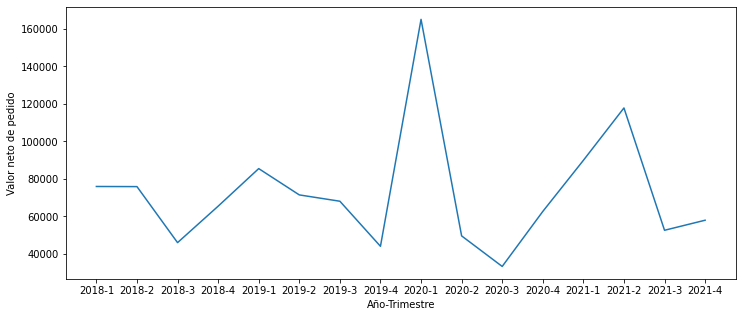

In [51]:
# Luego, en el siguiente gráfico, se observa la distribución de compras de servicios desde el año 2018 al 2021. Esto nos ayudará a tomar en
# cuenta las temporadas donde se ejecutan las adjudicaciones. Se observa que hay un pico en el primer trimestre del 2020. Sin embargo, a lo largo del resto del tiempo,
# se debe evaluar si hay estacionalidad de algunos servicios, que posteriormente se agruparán por análisis no supervisado. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
sns.lineplot(data=dfServiciosSumTrim)

In [52]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# Generando cloud break 
from wordcloud import WordCloud, STOPWORDS
#Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
dfServicios.rename(columns={'Texto breve':'descripcion'},inplace=True)
dfServicios.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Documento compras,Posición,Fecha documento,Nombre del proveedor,descripcion,Valor neto de pedido,Por entregar (valor),Moneda,Contrato marco,Organización compras,In.período validez,Fin período validez,Trimestre,Año,Año-Trimestre
22,4200006909,10,2018-02-01,218318 CJ NETCOM S.A.C.,Sostenimiento - Mina,188.245162,0.0,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1
23,4200006912,10,2018-03-01,10214 ADMINISTRACION DE EMPRES,Desatado de rocas con scaler,19.732838,0.0,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1
24,4200006912,20,2018-03-01,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento / Servicios,559.319462,0.0,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1
25,4200006913,10,2018-03-01,16500 MANPOWER PERU S.A.,Ampliación de presupuesto,212.000000,0.0,PEN,4.000001e+09,MPU1,3/01/2017,28/02/2018,1,2018,2018-1
26,4200006914,10,2018-03-01,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento (AFE),109.027348,0.0,USD,4.000001e+09,RPU1,1/12/2017,31/12/2017,1,2018,2018-1


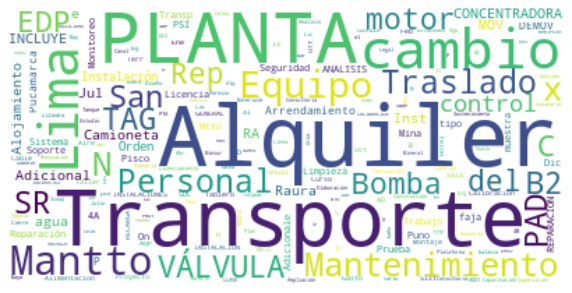

In [55]:
df = dfServicios
text1 = " ".join(map(str, (title for title in df.descripcion)))
# Creo una nube de palabras
stop_words = ["de", "Servicio","Servicios", "Serv","para","Rafael","y","en","Srv","a","CHO","con"]
word_cloud2 = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white').generate(text1)
# muestro la nube de palabras
plt.figure(figsize = (10,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
# Creamos la columna Contrato para categorizar los servicios permanentes y spot. Aquellos que cuentan con contrato marco, se puede sobreentender que han pasado por un proceso complejo de
# adjudicación y corresponde a un servicio permanente o recurrente. El resto de servicios que no cuentan con contrato marco, se puede sobreentender que son solicitudes nuevas o spot.
dfServicios["Contrato"] = np.where(dfServicios['Contrato marco'] >0 , True, False)
dfServicios

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Documento compras,Posición,Fecha documento,Nombre del proveedor,descripcion,Valor neto de pedido,Por entregar (valor),Moneda,Contrato marco,Organización compras,In.período validez,Fin período validez,Trimestre,Año,Año-Trimestre,Contrato
22,4200006909,10,2018-02-01,218318 CJ NETCOM S.A.C.,Sostenimiento - Mina,188.245162,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1,True
23,4200006912,10,2018-03-01,10214 ADMINISTRACION DE EMPRES,Desatado de rocas con scaler,19.732838,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1,True
24,4200006912,20,2018-03-01,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento / Servicios,559.319462,0.000000,USD,4.000001e+09,RPU1,27/11/2017,31/12/2017,1,2018,2018-1,True
25,4200006913,10,2018-03-01,16500 MANPOWER PERU S.A.,Ampliación de presupuesto,212.000000,0.000000,PEN,4.000001e+09,MPU1,3/01/2017,28/02/2018,1,2018,2018-1,True
26,4200006914,10,2018-03-01,10214 ADMINISTRACION DE EMPRES,Laboreo / Sostenimiento (AFE),109.027348,0.000000,USD,4.000001e+09,RPU1,1/12/2017,31/12/2017,1,2018,2018-1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89215,5800010483,10,2021-12-26,220382 IMPROMEC S.R.L.,Reforzamiento estructural nave de flotac,57.084610,0.000000,USD,NaN,RPU1,NaN,NaN,4,2021,2021-4,False
89216,5800010484,10,2021-12-29,22561 GoldSim Technology Group,Software Goldsim,2.357143,0.000000,USD,NaN,RPU1,NaN,NaN,4,2021,2021-4,False
89217,5800010485,10,2021-12-29,220825 DHI PERU S.A.C.,Software Felow 7.5,8.309524,0.000000,USD,NaN,RPU1,NaN,NaN,4,2021,2021-4,False
89218,5800010486,10,2021-12-31,216713 WHITE LION S.A.,Instalación de Sist. Comensales - 2Pers.,2.111905,2.111905,USD,NaN,RPU1,NaN,NaN,4,2021,2021-4,False


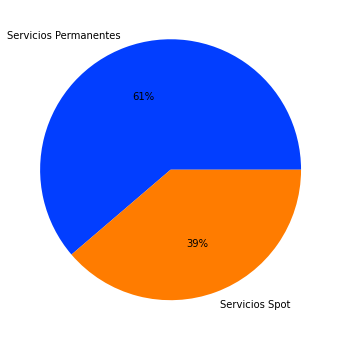

In [71]:
totalesValorTrueContratoMarco = dfServicios.loc[(dfServicios['Contrato'] == True)]
totalesValorTrueContratoMarco = totalesValorTrueContratoMarco['Valor neto de pedido'].sum()
totalesValorFalseContratoMarco = dfServicios.loc[(dfServicios['Contrato'] == False)]
totalesValorFalseContratoMarco = totalesValorFalseContratoMarco['Valor neto de pedido'].sum()

data = [totalesValorTrueContratoMarco, totalesValorFalseContratoMarco]
labels = ['Servicios Permanentes', 'Servicios Spot']
colors = sns.color_palette('bright')[0:5]
fix, ax = plt.subplots(figsize = (6,6))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Borrador/Otros

In [ ]:
# En el siguiente gráfico, se observa la cantidad de pedidos que gestionó cada comprador del equipo durante el 2021, quienes tienen un código de grupo de compras en SAP
dfServicios5 = dfServicios.loc[(dfServicios['Fecha documento'] >= '2021-01-01') & (dfServicios['Fecha documento'] < '2021-12-31')]
dfServicios5 = dfServicios5[['Grupo de compras', 'Valor neto de pedido']].groupby(by='Grupo de compras')
dfServicios5 = dfServicios5['Valor neto de pedido'].count().sort_values(ascending=False)
dfServicios5

In [ ]:
# Se observa que el comprador 103 gestionar la mayor cantidad de requerimientos, quien pertenece al Corporativo. Seguido por los compradores 170 y 333. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), sharex=True, sharey=True)  
dfServicios5.plot(kind = 'bar')
ax.set_title('Órdenes de compra de servicio generadas por comprador')
ax.set_ylabel('Cantidad de OS (unds)')
ax.set_xlabel('Comprador')

In [ ]:
# En el siguiente gráfico, se muestra el top 10 de empresas que tienen ordenes de compra en orden descendente durante el 2021.
dfServicios6 = dfServicios.loc[(dfServicios['Fecha documento'] >= '2021-01-01') & (dfServicios['Fecha documento'] < '2021-12-31')]
dfServicios6 = dfServicios6[['Nombre del proveedor', 'Valor neto de pedido']].groupby(by='Nombre del proveedor')
dfServicios6 = dfServicios6['Valor neto de pedido'].sum().sort_values(ascending=False)
dfServicios6

In [ ]:
# En el siguiente gráfico, se visualiza la proporción de servicios permamentes vs servicios spot. Aquellos que cuentan con contrato marco, son servicios permanentes.
dfServicios7 = dfServicios.loc[(dfServicios['Fecha documento'] >= '2021-01-01') & (dfServicios['Fecha documento'] < '2021-12-31')]
dfServicios7 = dfServicios7['Contrato marco'].value_counts()
dfServicios7

In [78]:
!git remote add origin https://github.com/RaquelMamani/ComprasdeServicios_GutierrezRocio_MamaniRaquel.git

fatal: not a git repository (or any of the parent directories): .git


In [77]:
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
